<h1 style="color:gold">Ex 5: Deutsch-Jozsa Algorithm</h1>


The Deutsh-Josza Algorithm serves no purpose but to ilustrates what Quantum computers are good at, which is evaluating a range of inputs all at once.

Whereas a classical computer would run such algorithm in O(2^n-1), effectively evaluating half the input range, a quantum computer with n-qbits can do it in O(1) so constant time.

Leveraging quantum entanglement and superposition<br>

<h2>Qubits: Three Key Concepts Enabling Advanced Computation</h2>

<ul>
    <li><b>Superposition and Hilbert Space</b>: Qubits live in a <i>Hilbert space</i>, meaning they can exist in a superposition of the |0> and |1> states (They are vectors). This allows qubits to "explore" many possibilities simultaneously during computation. However, when measured, the qubit collapses to either |0> or |1>, similar to binary values.</li><br>
    <li><b>Measurement</b>: While qubits can be in a "floating" superposition state during computation, they become "bound" to a binary value—either |0> or |1>—when we measure them.</li><br>
    <li><b>Exponential Growth through Entanglement</b>: In classical systems, adding a bit increases the total number of possible states exponentially in terms of the "space size" (O(2^n)), where n is the number of bits. Each bit can be 0 or 1, so the more bits you have, the more possible configurations the system can store. However, with qubits, each additional qubit increases the <i>dimensionality</i> of the system's state space exponentially. Qubits are vectors in a high-dimensional space, and when we entangle them, they interact in such a way that the system's state becomes exponentially more complex. This means the <b>dimensional space</b> the qubits can explore grows as O(2^n), but this scaling is not about the number of possible binary configurations; it's about the increasing complexity of the system's overall state as a <i>vector</i>.</li>



</ul>

<h3>Hilbert Space and Measurement</h3>

<p>A qubit's state is a vector in a Hilbert space. For a single qubit, the basis vectors are:</p>
<ul>
    <li>The |0> state: <span style="font-family: monospace">(1, 0)</span></li>
    <li>The |1> state: <span style="font-family: monospace">(0, 1)</span></li>
</ul>

<p>During computation, a qubit’s state is a superposition of these basis vectors:</p>

<p><i>ψ</i> = <i>α</i>|0> + <i>β</i>|1>, where α and β are complex numbers, and |α|² + |β|² = 1.</p>

<p>When you measure the qubit, it collapses to either |0> or |1>, based on the probabilities |α|² and |β|².</p>


In [31]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import math as m
import matplotlib

In [32]:
quasm_sim = AerSimulator(target="quasm_simulator")
statevec_sim = AerSimulator(target="satevector_simulator")

In [33]:
def balanced_oracle(qc: QuantumCircuit, qbits_count: int):
    """Entangle each |x> with |y>"""
    for n in range(qbits_count - 1):
        qc.cx(n, qbits_count - 1)

def constant_oracle_all_zero(qc, qbits_count):
    """Do nothing, since |x> is init to |0> it's the same as outputing constant |0>"""
    return

def constant_oracle_all_one(qc, qbits_count):
    """Put them all to |1>"""
    for n in range(qbits_count - 1):
        qc.ry(m.pi ,n)
    return

In [34]:
qbits_count = 4

if qbits_count < 3:
    qbits_count = 3
if qbits_count > 16:
    qbits_count = 16


qc = QuantumCircuit(qbits_count, qbits_count - 1)
my_range = range(qbits_count)

qc.ry(m.pi, qbits_count - 1) # Set the last qbits to -|1>
qc.barrier()
for n in my_range: # Put all Qbits in superposition: 1/sqrt(2) * (|0> + |1>)
    qc.h(n)
qc.barrier()

# Select an oracle to test
# balanced_oracle(qc, qbits_count)
constant_oracle_all_one(qc, qbits_count)
# constant_oracle_all_zero(qc, qbits_count)
qc.barrier()

my_range = my_range[:-1]

for n in my_range:
    qc.h(n)
qc.save_statevector()
qc.measure(my_range, my_range) # Measure elements from the Qbits list into the Cbits list

if qbits_count < 5:
    qc.draw()
else:
    print(f"Qbitcount: {qbits_count}")


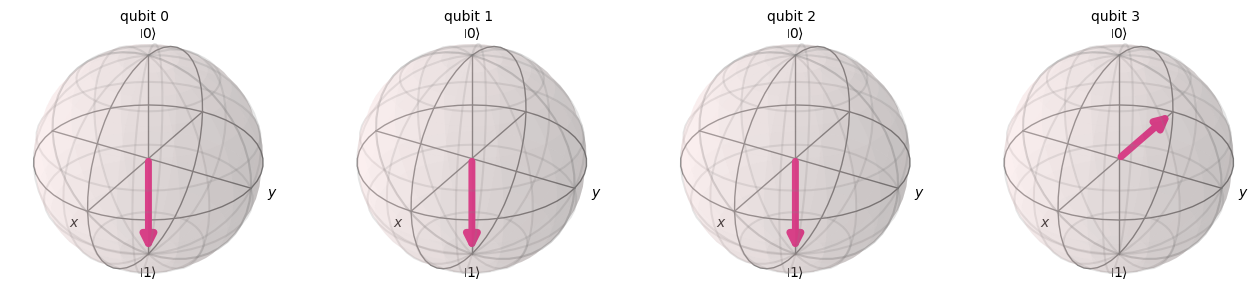

In [39]:
state_vec = statevec_sim.run(qc).result().get_statevector(qc)
plot_bloch_multivector(state_vec)

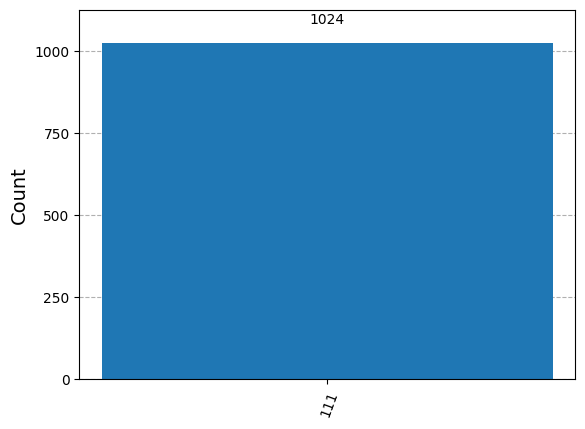

In [36]:
counts = quasm_sim.run(qc).result().get_counts()
plot_histogram(counts)